# Random Forest

# Read the CSV and Perform Basic Data Cleaning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Resources/insurance_claims.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['age', 'total_claim_amount', 'auto_year', 'incident_hour_of_the_day', 'injury_claim', 'property_claim', 'vehicle_claim']]
selected_features

,age,total_claim_amount,auto_year,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim
0,48,71610,2004,5,6510,13020,52080
1,42,5070,2007,8,780,780,3510
2,29,34650,2007,7,7700,3850,23100
3,41,63400,2014,5,6340,6340,50720
4,44,6500,2009,20,1300,650,4550
...,...,...,...,...,...,...,...
995,38,87200,2006,20,17440,8720,61040
996,41,108480,2015,23,18080,18080,72320
997,34,67500,1996,4,7500,7500,52500
998,62,46980,1998,2,5220,5220,36540


# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
# X = selected_features
# y = df['vehicle_claim']
# print(X.shape, y.shape)

In [ ]:
X = selected_features
y = df['auto_year']
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
training_score = rf.score(X_train, y_train)
testing_score = rf.score(X_test, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

In [ ]:
rf.get_params()

In [34]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.4533630209787206, 'auto_year'),
 (0.09791719725801759, 'injury_claim'),
 (0.09477208437355518, 'vehicle_claim'),
 (0.09317908302646424, 'total_claim_amount'),
 (0.09202092240467291, 'property_claim'),
 (0.08781953687181168, 'age'),
 (0.08092815508675792, 'incident_hour_of_the_day')]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10, 50],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005]}
# grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Single best score achieved across all params (k)
# print(grid.best_score_)
# # Dictionary containing the parameters (k) used to generate that score
# print(grid.best_params_)

# # Actual model object fit with those best parameters
# # Shows default parameters that we did not specify
# print(grid.best_estimator_)

In [39]:
# Make predictions with the model
predictions = rf.predict(X_test)

In [40]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2003,2003
1,2006,2006
2,2007,2007
3,2012,2012
4,2005,2005
...,...,...
245,2006,2006
246,2001,2001
247,2005,2005
248,2013,2013


In [41]:
results.head(10)

,Prediction,Actual
0,2003,2003
1,2006,2006
2,2007,2007
3,2012,2012
4,2005,2005
5,2010,2010
6,2010,2010
7,2013,2013
8,2004,2005
9,2015,2015


In [42]:
results.tail(10)

,Prediction,Actual
240,2014,2014
241,1995,1995
242,2001,2001
243,1998,1998
244,1996,1996
245,2006,2006
246,2001,2001
247,2005,2005
248,2013,2013
249,1999,1999


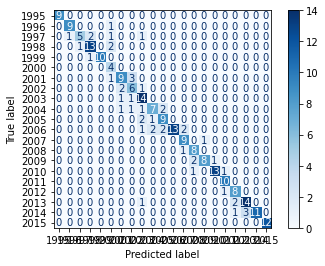

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

In [37]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

In [38]:
# Saving model by updating "your_name" with Adebayo
# and "your_model" with model variable
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_RF.sav'
joblib.dump(rf, filename)

['Adebayo_RF.sav']

In [24]:
!pip install sqlalchemy
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

In [25]:
csv_file = "./Resources/insurance_claims.csv"
claims_df = pd.read_csv(csv_file)
claims_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [37]:
# json_file = ("./Resources/insurance_claims.csv.json")
# claims_df = pd.read_json(json_file)
# claims_df.head()

In [1]:
!conda install psycopg2

d out with exit status 1:
     command: /Users/amusaadebayo/opt/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/rh/wmk79rjs1bd0qrdbhhk8xc140000gn/T/pip-install-nk47yja4/psycopg2_89a1b7e2d5ce45bd94ae24442dc45934/setup.py'"'"'; __file__='"'"'/private/var/folders/rh/wmk79rjs1bd0qrdbhhk8xc140000gn/T/pip-install-nk47yja4/psycopg2_89a1b7e2d5ce45bd94ae24442dc45934/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/rh/wmk79rjs1bd0qrdbhhk8xc140000gn/T/pip-pip-egg-info-fdvg5a80
         cwd: /private/var/folders/rh/wmk79rjs1bd0qrdbhhk8xc140000gn/T/pip-install-nk47yja4/psycopg2_89a1b7e2d5ce45bd94ae24442dc45934/
    Complete output (6 lines):
    Traceback (most recent call last):


In [ ]:
[y]

In [38]:
rds_connection_string = "CommAde1@hotmail.com:Kola@#$1463@localhost:5432/claims_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
engine.table_names()

In [ ]:
new_claims_df.to_sql(name='claims', con=engine, if_exists='append', index=False)

In [ ]:
pd.read_sql_query('select * from claims', con=engine).head()